<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 4 heads, you win 30 dollars. 
```
```
Otherwise you loss 5 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [2]:
function binomial_p(n,k,p)
    return factorial(n)/(factorial(k)*factorial(n-k)) * p^k * (1-p)^(n-k)
end

binomial_p (generic function with 1 method)

In [3]:
binomial_p(10,2,0.4)

0.12093235199999998

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [4]:
p_win = binomial_p(10,4,0.4)

0.250822656

The chance of losing the bet:

In [5]:
p_lose = 1-binomial_p(10,4,0.4)

0.749177344

### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [6]:
val_win = 30
val_lose = -5
expectation = p_win*val_win + p_lose*val_lose
# Expectation is positive; you would win money in this game.

3.778792959999999

### 1.4

1. What if you need to get exactly 3 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [7]:
p_win_3 = binomial_p(10,3,0.4)
print("Win: ",p_win_3,"\n")
p_lose_3 = 1 - binomial_p(10,3,0.4)
print("Lose: ",p_lose_3,"\n")
expectation_3 = p_win_3*val_win + p_lose_3*val_lose
print("Expectation: ",expectation_3)

Win: 0.21499084799999998
Lose: 0.785009152
Expectation: 2.52467968

The expectation is still positive, so I would still expect to earn money in this case, due to the much higher amount gained when winning compared to the amount lost when losing the game.

# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 4x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [25]:
import Pkg
Pkg.activate(".")
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

  Activating new project at `d:\Git_Repos\Julia\BME-502-2025-homeworks`
   Resolving package versions...
    Updating `D:\Git_Repos\Julia\BME-502-2025-homeworks\Project.toml`
  [31c24e10] + Distributions v0.25.117
  [91a5bcdd] + Plots v1.40.9
  [f27b6e38] + Polynomials v4.0.19
  [10745b16] + Statistics v1.11.1
  [9a3f8284] + Random v1.11.0
    Updating `D:\Git_Repos\Julia\BME-502-2025-homeworks\Manifest.toml`
  [66dad0bd] + AliasTables v1.1.3
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.8
  [35d6a980] + ColorSchemes v3.29.0
  [3da002f7] + ColorTypes v0.12.0
  [c3611d14] + ColorVectorSpace v0.11.0
  [5ae59095] + Colors v0.13.0
  [34da2185] + Compat v4.16.0
  [f0e56b4a] + ConcurrentUtilities v2.5.0
  [187b0558] + ConstructionBase v1.5.8
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.20
  [8bb1440f] + DelimitedFiles v1.9.1
  [31c24e10] + Distributions v0.25.117
  [ffbed154] + DocStringExtensions v0.9.3
  [460bff9d] + Except

In [26]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [28]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 3
noise = rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [33]:
line_fit = Polynomials.fit(x,y_observed,1)
fit_coeff = Polynomials.coeffs(line_fit)

2-element Vector{Float64}:
 -1.5684191178370313
  3.973248833627442

### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [34]:
function chisqr(b,m,x,y_observed,sigma)
    chisqr_val = sum((y_observed .- (m .* x .+ b)) .^2 ./ sigma^2)
    return chisqr_val
end

chisqr (generic function with 1 method)

### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [35]:
chi2_list = []
for i in 1:10000
    noise = Random.rand(di.Normal(0,sigma),length(x))
    y_observed = y_true .+ noise;
    line_fit = Polynomials.fit(x,y_observed,1)
    fit_coeff = Polynomials.coeffs(line_fit)
    chisqr_val = chisqr(fit_coeff[1],fit_coeff[2],collect(x),y_observed,sigma)
    push!(chi2_list,chisqr_val)
end

### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [38]:
chi2_mean = Statistics.mean(chi2_list)

8.992295468316847

This does make sense because the Chi-square value should be equal to the degrees of freedom of the fit, or the difference between the number of data points and the number of degrees of freedom. We use 11 data points (0 through 10 inclusive) and two degrees of freedom (first order polynomial), thus 11-2=9, very close to our calculated value of 9.055.

### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:40
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

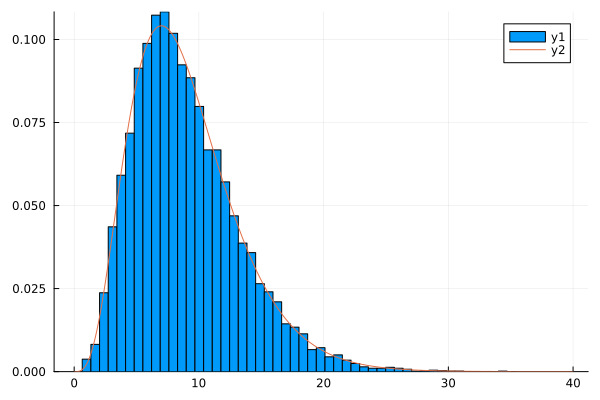

In [46]:
dist = di.Chisq(9)
x_dist = 0:0.1:40
# chisq_pdf = dist(x_dist)
Plots.histogram(chi2_list,bins=range(minimum(chi2_list),maximum(chi2_list),length=51),normed=true)
#plot!(x_dist,chisq_pdf)
Plots.plot!(x_dist, di.pdf.(dist,x_dist))

### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:8
3. Define b_range = -9:0.01:10
4. Make a contour plot to visualize the distribution of the likelihood


In [47]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

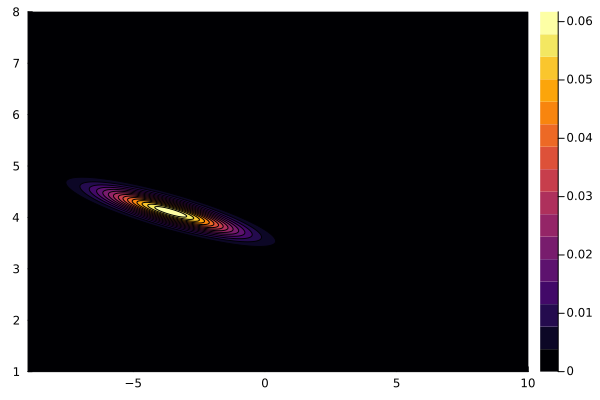

In [49]:
m_range = 1:0.01:8
b_range = -9:0.01:10
Plots.contourf(b_range,m_range,p_chi2poly)

### 2.7

1. Redefine x = 0:0.5:4 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

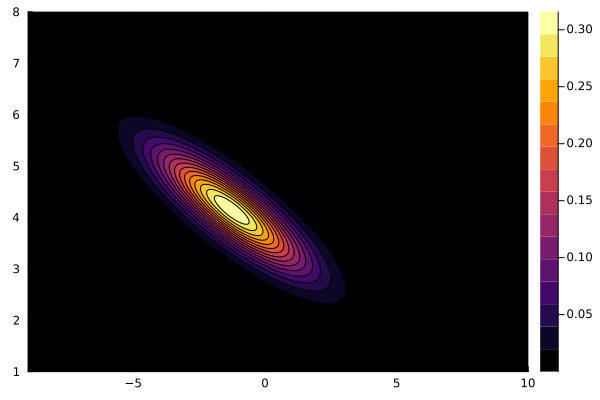

In [50]:
x = 0:0.5:4
y_true = 4 .* x .- 2
sigma = 3
noise = rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
Plots.contourf(b_range,m_range,p_chi2poly)

There are fewer points in this range, only 9 rather than 11, and it is over a shorter range, ending at 4 rather than 10. As such, there is more flexibility for the x-intercept (b) to vary, as well as for the slope to be much lower or higher, as the points are more tightly clustered together. As a result, the distribution is wider. 

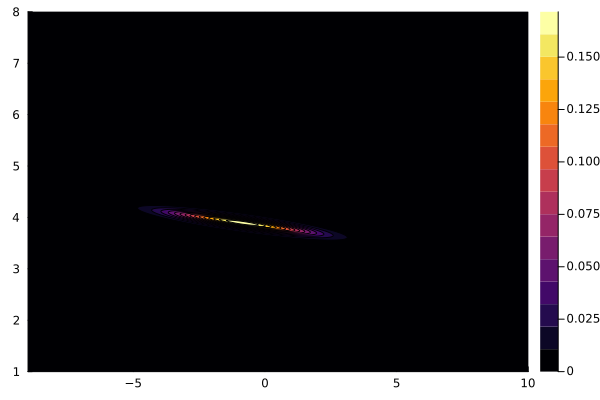

In [51]:
x = 0:2:20
y_true = 4 .* x .- 2
sigma = 3
noise = rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
Plots.contourf(b_range,m_range,p_chi2poly)

Because this range is almopst twice the range of Q2.6, there is much less uncertainty over the slope, measuring from a much larger maximum-minimum x-value. This wider range still allows some variation in the y-intercept, but not very much. 

### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 6 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1.5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

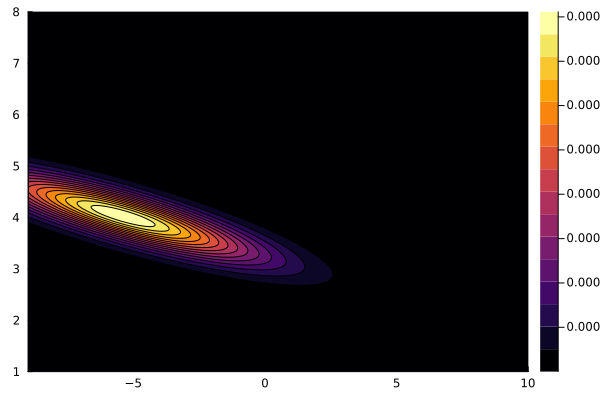

In [52]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 6
noise = rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
Plots.contourf(b_range,m_range,p_chi2poly)

With double the standard deviation and four times the variance, the uncertainty is much higher, reflected in how the plotted graph has a much wider distribution of potential values, none of which have a high probability. 

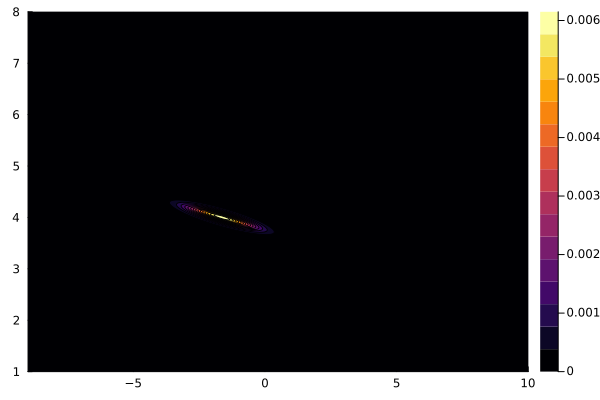

In [53]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 1.5
noise = rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);
Plots.contourf(b_range,m_range,p_chi2poly)

With half the standard deviation and one fourth the variance, the distribution is much more tightly clustered around m=4 and b=-2, the true values of the function underlying the data. Due to the lower uncertainty, the distribution is much narrower. 